# Car Prediction

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("D:\\Data Science\\ML-Project\\carprediction\\car_data.csv")

In [3]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [4]:
df.count()

Car_Name         301
Year             301
Selling_Price    301
Present_Price    301
Kms_Driven       301
Fuel_Type        301
Seller_Type      301
Transmission     301
Owner            301
dtype: int64

In [5]:
#checking the missing values
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [6]:
df.shape

(301, 9)

In [7]:
#find the unique values for categorical col
print(df['Seller_Type'].unique())
print(df['Transmission'].unique())
print(df['Owner'].unique())
print(df['Fuel_Type'].unique())

['Dealer' 'Individual']
['Manual' 'Automatic']
[0 1 3]
['Petrol' 'Diesel' 'CNG']


In [8]:
df.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner'],
      dtype='object')

In [9]:
final_dataset =df[['Year', 'Selling_Price', 'Present_Price', 'Kms_Driven','Fuel_Type', 'Seller_Type', 'Transmission', 'Owner']];

In [10]:
final_dataset.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [11]:
final_dataset['Current_year'] = 2020

In [12]:
final_dataset.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Current_year
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,2020
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,2020
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,2020
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,2020
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,2020


In [13]:
final_dataset['no_year '] = final_dataset['Current_year']- final_dataset['Year']

In [14]:
final_dataset.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Current_year,no_year
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,2020,6
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,2020,7
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,2020,3
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,2020,9
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,2020,6


In [15]:
#drop year and Current_year
#inplace=True  because operation happens permanently change the values in data
final_dataset.drop(['Year', 'Current_year'], axis=1, inplace=True)

In [16]:
final_dataset.head()

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,no_year
0,3.35,5.59,27000,Petrol,Dealer,Manual,0,6
1,4.75,9.54,43000,Diesel,Dealer,Manual,0,7
2,7.25,9.85,6900,Petrol,Dealer,Manual,0,3
3,2.85,4.15,5200,Petrol,Dealer,Manual,0,9
4,4.60,6.87,42450,Diesel,Dealer,Manual,0,6


In [17]:
# convert the categorical data into binary using dummy 
# drop_first=True --> Used to delete the first col ddleted to prevent the dummy variable trap

final_dataset = pd.get_dummies(final_dataset, drop_first=True)

In [18]:
final_dataset.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,no_year,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,6,0,1,0,1
1,4.75,9.54,43000,0,7,1,0,0,1
2,7.25,9.85,6900,0,3,0,1,0,1
3,2.85,4.15,5200,0,9,0,1,0,1
4,4.60,6.87,42450,0,6,1,0,0,1


In [19]:
#Find teh co-relationship on each other data point

final_dataset.corr()

,Selling_Price,Present_Price,Kms_Driven,Owner,no_year,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
Selling_Price,1.000000,0.878983,0.029187,-0.088344,-0.236141,0.552339,-0.540571,-0.550724,-0.367128
Present_Price,0.878983,1.000000,0.203647,0.008057,0.047584,0.473306,-0.465244,-0.512030,-0.348715
Kms_Driven,0.029187,0.203647,1.000000,0.089216,0.524342,0.172515,-0.172874,-0.101419,-0.162510
Owner,-0.088344,0.008057,0.089216,1.000000,0.182104,-0.053469,0.055687,0.124269,-0.050316
no_year,-0.236141,0.047584,0.524342,0.182104,1.000000,-0.064315,0.059959,0.039896,-0.000394
Fuel_Type_Diesel,0.552339,0.473306,0.172515,-0.053469,-0.064315,1.000000,-0.979648,-0.350467,-0.098643
Fuel_Type_Petrol,-0.540571,-0.465244,-0.172874,0.055687,0.059959,-0.979648,1.000000,0.358321,0.091013
Seller_Type_Individual,-0.550724,-0.512030,-0.101419,0.124269,0.039896,-0.350467,0.358321,1.000000,0.063240
Transmission_Manual,-0.367128,-0.348715,-0.162510,-0.050316,-0.000394,-0.098643,0.091013,0.063240,1.000000


In [20]:
import seaborn as sns

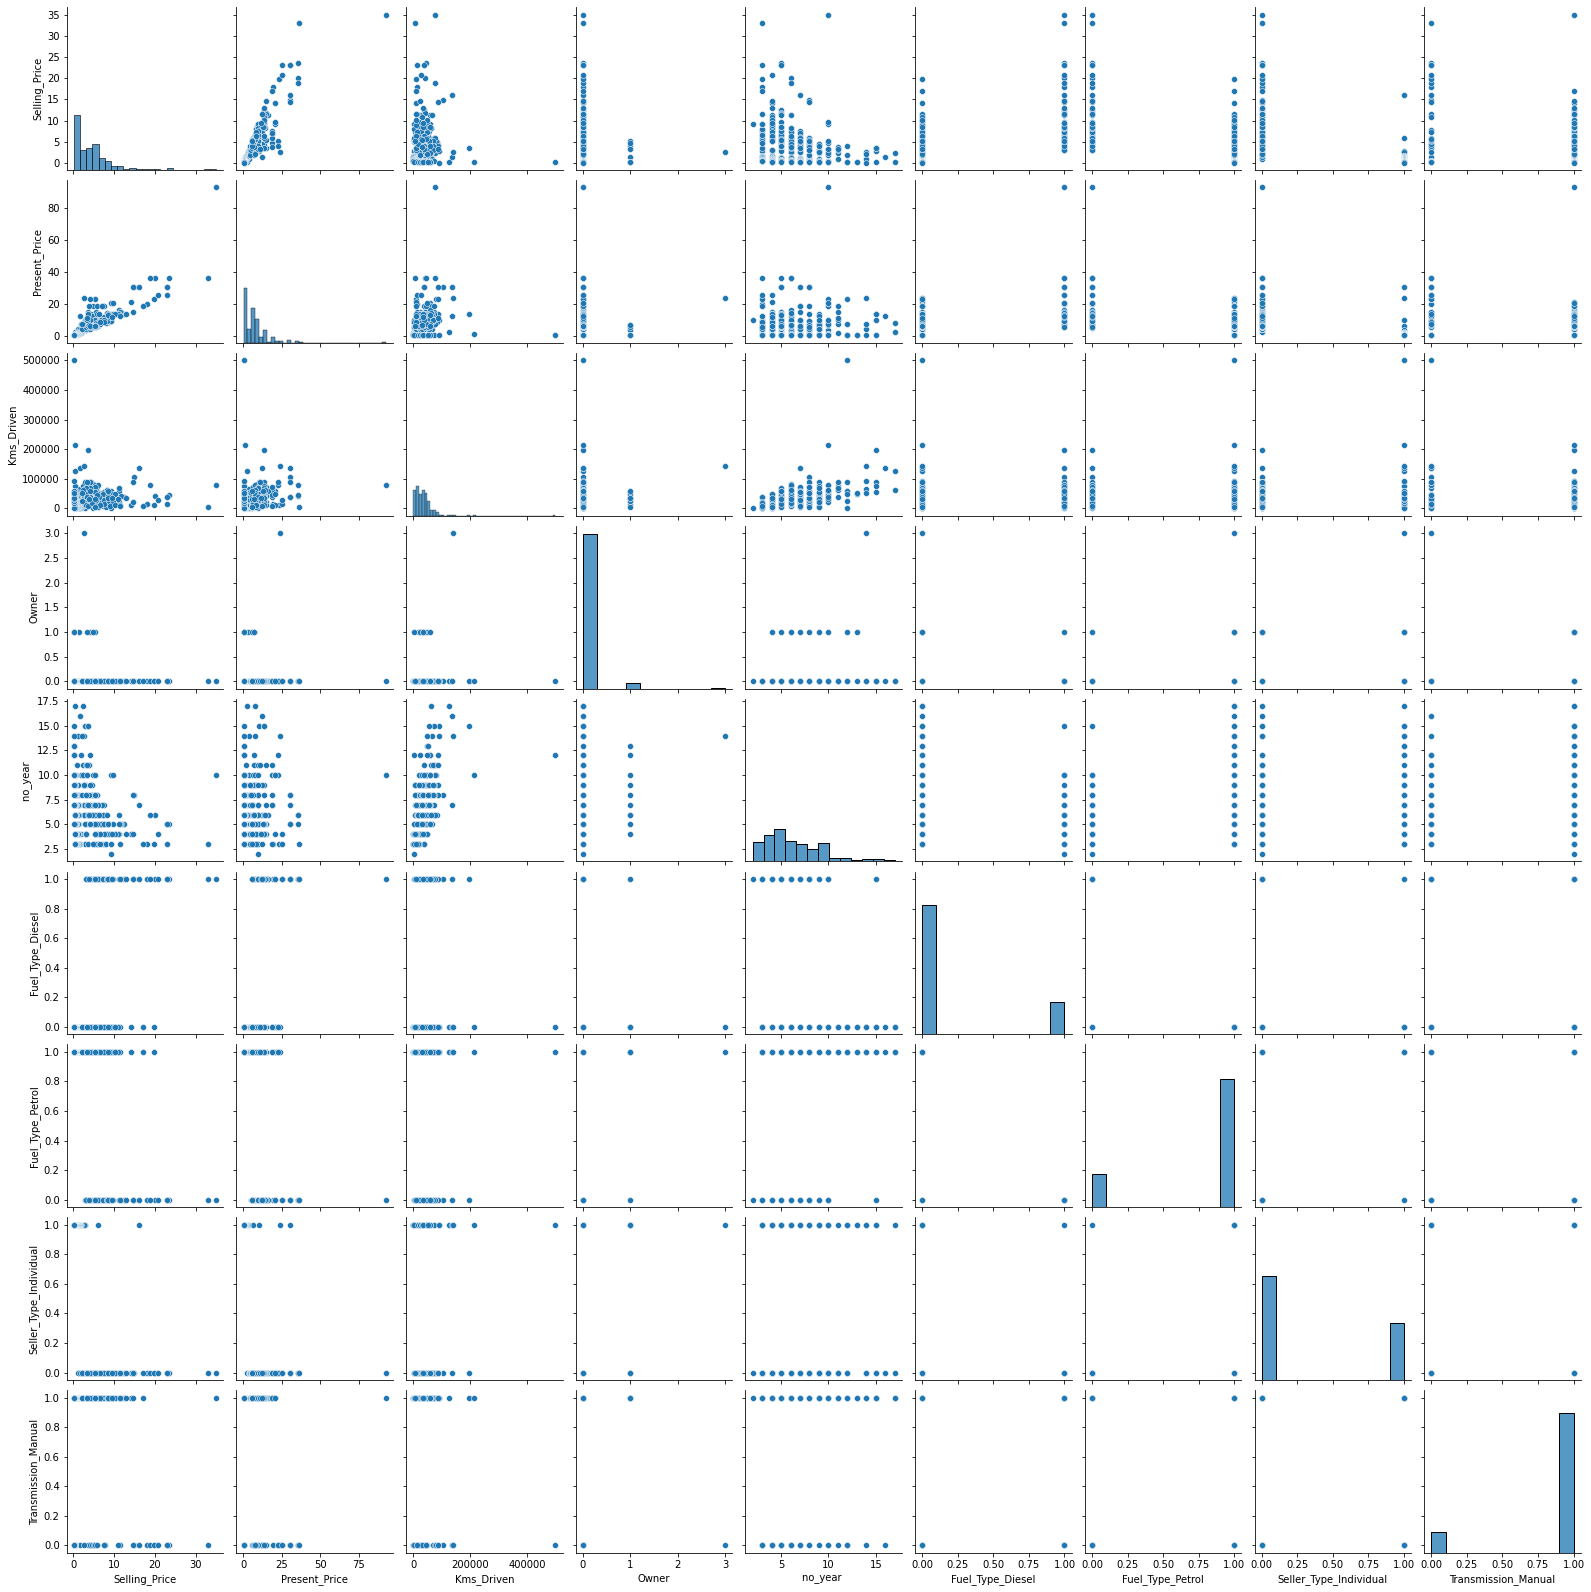

In [21]:
sns.pairplot(final_dataset)

In [22]:
import matplotlib.pyplot as plt
%matplotlib inline

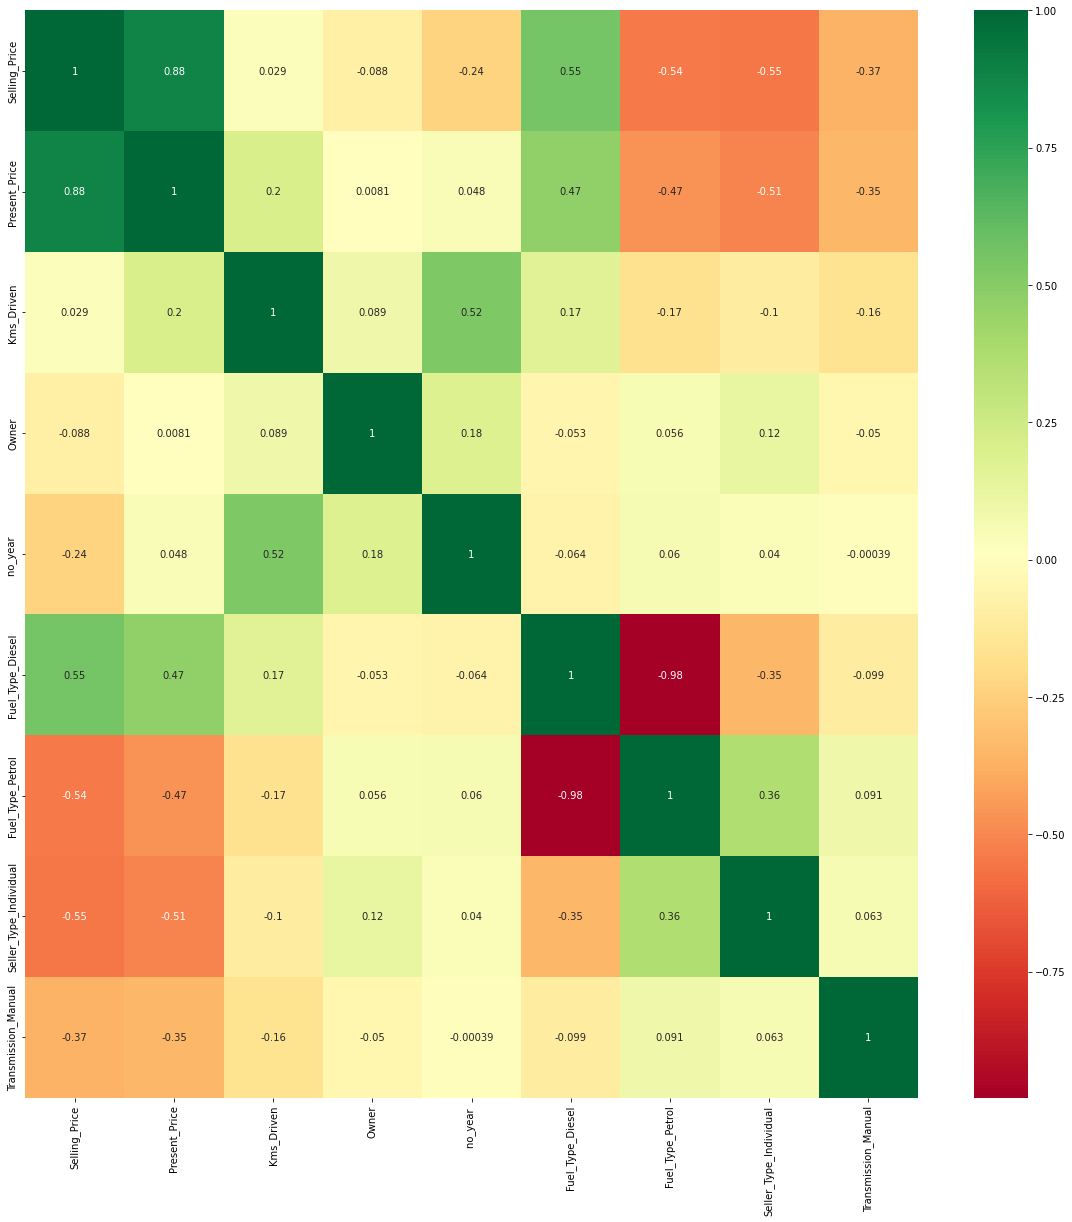

In [23]:
corrmat = final_dataset.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20, 20))

#plot the heatmap
g=sns.heatmap(final_dataset[top_corr_features].corr(),annot=True,cmap="RdYlGn")

# need to find the seling price so its a dependent features

In [24]:
final_dataset.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,no_year,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,6,0,1,0,1
1,4.75,9.54,43000,0,7,1,0,0,1
2,7.25,9.85,6900,0,3,0,1,0,1
3,2.85,4.15,5200,0,9,0,1,0,1
4,4.60,6.87,42450,0,6,1,0,0,1


In [25]:
X = final_dataset.iloc[:,1:]
X.head()

,Present_Price,Kms_Driven,Owner,no_year,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,5.59,27000,0,6,0,1,0,1
1,9.54,43000,0,7,1,0,0,1
2,9.85,6900,0,3,0,1,0,1
3,4.15,5200,0,9,0,1,0,1
4,6.87,42450,0,6,1,0,0,1


In [26]:
y = final_dataset.iloc[:, 0]
y.head()

0    3.35
1    4.75
2    7.25
3    2.85
4    4.60
Name: Selling_Price, dtype: float64

In [28]:
## Feature importance in orderwise
from sklearn.ensemble import ExtraTreesRegressor
model = ExtraTreesRegressor()
model.fit(X,y)

ExtraTreesRegressor()

In [32]:
print(model.feature_importances_)

[4.05832786e-01 4.00349413e-02 3.84620425e-04 7.93796886e-02
 2.11361806e-01 1.58531874e-02 1.17349788e-01 1.29803183e-01]


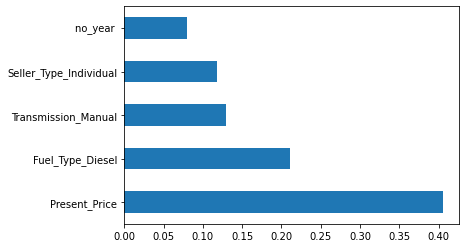

In [31]:
#plot a graph for feature importance for better visualization

feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(5).plot(kind='barh')
plt.show()


In [39]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2)

In [43]:
X_train.shape

(240, 8)

# RandomForest Regressor no need to scale the value bcs its decision tree

In [44]:
import numpy as np

In [45]:
from sklearn.ensemble import RandomForestRegressor
rf__random = RandomForestRegressor()

In [46]:
##hyper parameter
n_estimator= [int(x) for x in np.linspace(start = 100, stop=1200, num = 12)]
print(n_estimator)

[100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200]


In [51]:
# No. of feature considers at every split
max_features = ['auto', 'sqrt']

#max no. of levels in a tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]

#min no. of samples to require to split a node
min_samples_split = [2, 5, 10, 15, 100]

#min no. of samples to require to split a leaf
min_samples_leaf = [1, 2, 5, 10]


In [54]:
from sklearn.model_selection import RandomizedSearchCV

In [56]:
# random grid
random_grid = {
    'n_estimators' : n_estimator,
    'max_features' : max_features,
    'max_depth'    : max_depth,
    'min_samples_split': min_samples_split,
    'min_samples_leaf' : min_samples_leaf
}

In [57]:
print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}


In [58]:
#build a model
rf = RandomForestRegressor()

In [60]:
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, scoring='neg_mean_squared_error', n_iter=10, cv=5, verbose=2, random_state=42, n_jobs=1) 
rf_random.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   2.7s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   2.9s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   3.1s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   2.5s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   2.9s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   3.1s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   2.9s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimator

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [61]:

prediction = rf_random.predict(X_test) 

In [62]:
prediction

array([10.30388677, 10.12880609,  5.16679656,  3.10087479,  1.20369453,
        4.23745058,  0.70336133,  1.20610723,  5.51900306,  1.2863871 ,
        4.24871247, 11.25360557,  1.21903158,  0.70310955,  5.8514814 ,
        7.39570037,  5.16679656,  4.42441862,  1.20869997,  2.9124086 ,
        0.24950319,  0.51529985,  0.39443274,  4.82663759, 10.35812961,
       17.31163852,  7.47634779,  0.54412969,  4.992345  , 10.89746415,
        3.4363967 ,  7.64616974,  0.29909705,  5.34391486,  4.59027616,
        5.28342824, 10.19697533,  0.55968909,  0.25384245,  5.95176591,
        5.92195852,  0.44817565,  5.70210857,  1.22413195,  0.64090139,
       10.1607639 ,  2.81486289,  6.28172661,  5.39325872,  3.37893006,
        6.83809859,  0.60999601,  4.8835352 ,  2.80729771,  1.28379437,
        4.46598234,  8.52883297,  0.59432625,  1.20369453,  7.39816702,
        7.22887067])

c:\users\raju\anaconda3\envs\carprediction\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Selling_Price', ylabel='Density'>

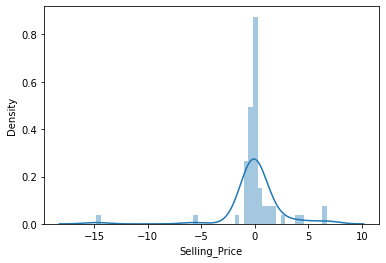

In [64]:
#it shows normal distribution so our model creation is giving a good result
#Y_test is an original values , The distance b/w y_test and predictions are close or minimal. so its 
#showing normal dist

sns.distplot(y_test - prediction)

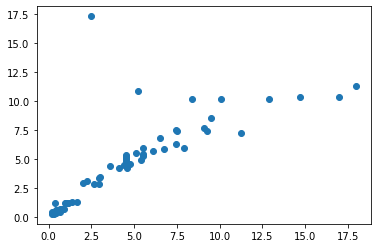

In [65]:
#Draw a scatter plot
plt.scatter(y_test, prediction)

In [66]:
#Create a pickle file
#Picke file is a serialized file usied for diployment
import pickle
#open  a fle , where you want to store the data
file = open('random_forest_regression_model.pkl', 'wb')

#dump information to that file
pickle.dump(rf_random, file)